# Descripción del ejercicio
He recibido una tarea analítica asignada por una tienda en línea internacional. Mis predecesores iniciaron una prueba A/B con el objetivo de evaluar un sistema de recomendaciones mejorado, pero no pudieron completarla. Según la documentación que dejaron, la prueba incluye detalles técnicos, resultados preliminares y un conjunto de datos relevantes. Mi responsabilidad será verificar la correcta ejecución del experimento, realizar un análisis exploratorio de datos (EDA) y evaluar los resultados obtenidos.

- Descripción técnica de la prueba
    - Nombre de la prueba: recommender_system_test

    - Grupos:

      - A: Grupo de control
      - B: Grupo con el nuevo embudo de pago

    - Fecha de lanzamiento: 2020-12-07

    - Fecha de cierre para nuevos usuarios: 2020-12-21

    - Fecha de finalización: 2021-01-01

    - Audiencia: 15% de los nuevos usuarios de la región de la UE

    - Propósito de la prueba:
      - Evaluar los efectos de un sistema de recomendaciones mejorado en el embudo de conversión de los usuarios. El objetivo es medir el desempeño en las siguientes etapas del embudo:

    - Vistas a la página del producto (product_page)
      - Agregar artículos al carrito (product_card)
    - Compras realizadas (purchase)
      - El resultado esperado es un aumento del 10% o más en cada etapa del embudo product_page → product_card → purchase dentro de los 14 días posteriores a la inscripción.

    - Número previsto de participantes: 6,000

Datos disponibles
  
## **ab_project_marketing_events_us.csv:**
  - Calendario de eventos de marketing para 2020.

**Estructura:**
- name: Nombre del evento de marketing
- regions: Regiones donde se llevará a cabo la campaña publicitaria
- start_dt: Fecha de inicio de la campaña
- finish_dt: Fecha de finalización de la campaña

### **final_ab_new_users_upd_us.csv:**
- Información de todos los usuarios registrados entre el 7 y el 21 de diciembre de 2020.

**Estructura:**
- user_id
- first_date: Fecha de inscripción
- region
- device: Dispositivo utilizado para la inscripción

### **final_ab_events_upd_us.csv:**
- Registro de todos los eventos generados por los nuevos usuarios entre el 7 de diciembre de 2020 y el 1 de enero de 2021.

**Estructura:**
- user_id
- event_dt: Fecha y hora del evento
- event_name: Tipo de evento (product_page, product_card, purchase, etc.)
- details: Información adicional sobre el evento (por ejemplo, el monto en USD para purchase)


### **final_ab_participants_upd_us.csv:**
- Información de los participantes del experimento.

**Estructura:**

- user_id
- ab_test: Nombre de la prueba
- group: Grupo asignado (A o B)
- Instrucciones para completar la tarea

**Objetivos del estudio**
- Verificar la correcta ejecución de la prueba A/B.
- Analizar los resultados del experimento para determinar si el sistema de recomendaciones mejorado tuvo el impacto esperado en las métricas de conversión.

**Exploración inicial de los datos**

- Verificar los tipos de datos:
    - ¿Es necesario realizar conversiones de tipos, como fechas o valores numéricos?
  - Identificar datos faltantes o duplicados:
    - ¿Cuántos valores ausentes hay en cada conjunto de datos?
    - ¿Se encuentran duplicados en alguna de las tablas? Caracterizar y resolver estos problemas.

**Análisis exploratorio de datos (EDA)**

  - Conversión en las etapas del embudo:
    - Medir la conversión en cada etapa del embudo (product_page → product_card → purchase).
  - Distribución de eventos por usuario:
      - Evaluar si el número de eventos por usuario está distribuido equitativamente entre los grupos de prueba.
  - Usuarios en múltiples muestras:
    - Verificar si hay usuarios que pertenecen tanto al grupo A como al B.
Distribución temporal de eventos:
    - Analizar cómo se distribuye el número de eventos por día.
  - Identificación de peculiaridades:
    - Detectar patrones o irregularidades en los datos que puedan influir en el análisis.

**Evaluación de resultados de la prueba A/B**

  - Comparación de métricas clave:
    - Comparar la conversión entre el grupo A (control) y el grupo B (nuevo embudo de pago) en cada etapa del embudo.

**Prueba de hipótesis:**

  - Utilizar una prueba z para verificar si las diferencias observadas entre las proporciones de conversión son estadísticamente significativas.

**Conclusiones**
- Resumir los hallazgos del análisis exploratorio de datos (EDA).
- Evaluar si el sistema de recomendaciones mejorado logró cumplir con el aumento esperado del 10% o más en cada etapa del embudo.
Proporcionar recomendaciones basadas en los resultados obtenidos.

# - Explora los datos:

  - ¿Es necesario convertir los tipos?
  - ¿Hay valores ausentes o duplicados? Si es así, ¿cómo los caracterizarías?

In [48]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
import numpy as np
from scipy import stats as st
from IPython.display import display
from scipy.stats import ttest_ind
from scipy.stats import shapiro
from datetime import datetime
import itertools
from scipy.stats import norm

In [6]:
marketing = pd.read_csv('/content/ab_project_marketing_events_clean.csv')
marketing

,name,regions,start_dt,finish_dt
0,Christmas&New Year Promo,"EU, N.America",2020-12-25,2021-01-03
1,St. Valentine's Day Giveaway,"EU, CIS, APAC, N.America",2020-02-14,2020-02-16
2,St. Patric's Day Promo,"EU, N.America",2020-03-17,2020-03-19
3,Easter Promo,"EU, CIS, APAC, N.America",2020-04-12,2020-04-19
4,4th of July Promo,N.America,2020-07-04,2020-07-11
5,Black Friday Ads Campaign,"EU, CIS, APAC, N.America",2020-11-26,2020-12-01
6,Chinese New Year Promo,APAC,2020-01-25,2020-02-07
7,Labor day (May 1st) Ads Campaign,"EU, CIS, APAC",2020-05-01,2020-05-03
8,International Women's Day Promo,"EU, CIS, APAC",2020-03-08,2020-03-10
9,Victory Day CIS (May 9th) Event,CIS,2020-05-09,2020-05-11


In [7]:
new_users = pd.read_csv('/content/final_ab_events_clean.csv')
new_users.head()

,user_id,event_dt,event_name,details
0,E1BDDCE0DAFA2679,2020-12-07 20:22:03,purchase,99.99
1,7B6452F081F49504,2020-12-07 09:22:53,purchase,9.99
2,9CD9F34546DF254C,2020-12-07 12:59:29,purchase,4.99
3,96F27A054B191457,2020-12-07 04:02:40,purchase,4.99
4,1FD7660FDF94CA1F,2020-12-07 10:15:09,purchase,4.99


In [8]:
events = pd.read_csv('/content/final_ab_events_clean.csv')
events

,user_id,event_dt,event_name,details
0,E1BDDCE0DAFA2679,2020-12-07 20:22:03,purchase,99.99
1,7B6452F081F49504,2020-12-07 09:22:53,purchase,9.99
2,9CD9F34546DF254C,2020-12-07 12:59:29,purchase,4.99
3,96F27A054B191457,2020-12-07 04:02:40,purchase,4.99
4,1FD7660FDF94CA1F,2020-12-07 10:15:09,purchase,4.99
...,...,...,...,...
423756,245E85F65C358E08,2020-12-30 19:35:55,login,NaN
423757,9385A108F5A0A7A7,2020-12-30 10:54:15,login,NaN
423758,DB650B7559AC6EAC,2020-12-30 10:59:09,login,NaN
423759,F80C9BDDEA02E53C,2020-12-30 09:53:39,login,NaN


In [9]:
participants = pd.read_csv('/content/final_ab_participants_clean.csv')
participants

,user_id,group,ab_test
0,D1ABA3E2887B6A73,A,recommender_system_test
1,A7A3664BD6242119,A,recommender_system_test
2,DABC14FDDFADD29E,A,recommender_system_test
3,04988C5DF189632E,A,recommender_system_test
4,4FF2998A348C484F,A,recommender_system_test
...,...,...,...
14520,1D302F8688B91781,B,interface_eu_test
14521,3DE51B726983B657,A,interface_eu_test
14522,F501F79D332BE86C,A,interface_eu_test
14523,63FBE257B05F2245,A,interface_eu_test


# *Marketing*

In [10]:
marketing.info()
marketing

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   name       14 non-null     object
 1   regions    14 non-null     object
 2   start_dt   14 non-null     object
 3   finish_dt  14 non-null     object
dtypes: object(4)
memory usage: 576.0+ bytes


,name,regions,start_dt,finish_dt
0,Christmas&New Year Promo,"EU, N.America",2020-12-25,2021-01-03
1,St. Valentine's Day Giveaway,"EU, CIS, APAC, N.America",2020-02-14,2020-02-16
2,St. Patric's Day Promo,"EU, N.America",2020-03-17,2020-03-19
3,Easter Promo,"EU, CIS, APAC, N.America",2020-04-12,2020-04-19
4,4th of July Promo,N.America,2020-07-04,2020-07-11
5,Black Friday Ads Campaign,"EU, CIS, APAC, N.America",2020-11-26,2020-12-01
6,Chinese New Year Promo,APAC,2020-01-25,2020-02-07
7,Labor day (May 1st) Ads Campaign,"EU, CIS, APAC",2020-05-01,2020-05-03
8,International Women's Day Promo,"EU, CIS, APAC",2020-03-08,2020-03-10
9,Victory Day CIS (May 9th) Event,CIS,2020-05-09,2020-05-11


### *Se tiene que cabiar el tipo de dato de la columna 'start_dt' y 'finish_dt' a tipo de dato datetime*

In [11]:
# Cambiar las columnas a tipo datetime
marketing['start_dt'] = pd.to_datetime(marketing['start_dt'])
marketing['finish_dt'] = pd.to_datetime(marketing['finish_dt'])

marketing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   name       14 non-null     object        
 1   regions    14 non-null     object        
 2   start_dt   14 non-null     datetime64[ns]
 3   finish_dt  14 non-null     datetime64[ns]
dtypes: datetime64[ns](2), object(2)
memory usage: 576.0+ bytes


# *New_users*

In [12]:
new_users.info()
new_users.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 423761 entries, 0 to 423760
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   user_id     423761 non-null  object 
 1   event_dt    423761 non-null  object 
 2   event_name  423761 non-null  object 
 3   details     60314 non-null   float64
dtypes: float64(1), object(3)
memory usage: 12.9+ MB


,user_id,event_dt,event_name,details
0,E1BDDCE0DAFA2679,2020-12-07 20:22:03,purchase,99.99
1,7B6452F081F49504,2020-12-07 09:22:53,purchase,9.99
2,9CD9F34546DF254C,2020-12-07 12:59:29,purchase,4.99
3,96F27A054B191457,2020-12-07 04:02:40,purchase,4.99
4,1FD7660FDF94CA1F,2020-12-07 10:15:09,purchase,4.99


### *Se Cambiara el tipo de dato de las columnas de event_dt a datetime y la columna user_id a string*

In [13]:
# Convertir la columna a tipo datetime
new_users['event_dt'] = pd.to_datetime(new_users['event_dt'])
# Convertir la columna a tipo string
new_users['user_id'] = new_users['user_id'].astype('string')

new_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 423761 entries, 0 to 423760
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   user_id     423761 non-null  string        
 1   event_dt    423761 non-null  datetime64[ns]
 2   event_name  423761 non-null  object        
 3   details     60314 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1), string(1)
memory usage: 12.9+ MB


### *Se creara dos nuevas columnas para una mejor manipulacion de datos posteriores, una que contenga la fecha y la otra columna que contenga la hora del evento*

In [14]:
# Crear las nuevas columnas con fecha y hora
new_users['event_date'] = new_users['event_dt'].dt.date
new_users['event_time'] = new_users['event_dt'].dt.time

# Verificar las nuevas columnas
new_users


,user_id,event_dt,event_name,details,event_date,event_time
0,E1BDDCE0DAFA2679,2020-12-07 20:22:03,purchase,99.99,2020-12-07,20:22:03
1,7B6452F081F49504,2020-12-07 09:22:53,purchase,9.99,2020-12-07,09:22:53
2,9CD9F34546DF254C,2020-12-07 12:59:29,purchase,4.99,2020-12-07,12:59:29
3,96F27A054B191457,2020-12-07 04:02:40,purchase,4.99,2020-12-07,04:02:40
4,1FD7660FDF94CA1F,2020-12-07 10:15:09,purchase,4.99,2020-12-07,10:15:09
...,...,...,...,...,...,...
423756,245E85F65C358E08,2020-12-30 19:35:55,login,NaN,2020-12-30,19:35:55
423757,9385A108F5A0A7A7,2020-12-30 10:54:15,login,NaN,2020-12-30,10:54:15
423758,DB650B7559AC6EAC,2020-12-30 10:59:09,login,NaN,2020-12-30,10:59:09
423759,F80C9BDDEA02E53C,2020-12-30 09:53:39,login,NaN,2020-12-30,09:53:39


## *Verificar valores nulos*

In [15]:
# Verificar valores nulos en cada columna
display(new_users.isnull().sum())


,0
user_id,0
event_dt,0
event_name,0
details,363447
event_date,0
event_time,0


In [16]:
# Calcular el porcentaje de valores nulos por columna
porcentaje_nulos = new_users.isnull().mean() * 100

# Mostrar los resultados en formato más amigable
display(porcentaje_nulos.sort_values(ascending=False))


,0
details,85.766977
user_id,0.000000
event_dt,0.000000
event_name,0.000000
event_date,0.000000
event_time,0.000000


### *Se convertiran los valores nulos de la columna details a -1*
#### *Podemos notar que tiene un 85.7% de valores nulos, pero que no son para espantarnos ya que por lo que vimos de la tabla significa que el resto nos esta diciendo que el evento se trato de una compra y su presio los demas eventos al parecer no requieren de un presio.*

In [17]:
# Cambiar los valores nulos de la columna details a -1
new_users['details'] = new_users['details'].fillna(-1)

new_users

,user_id,event_dt,event_name,details,event_date,event_time
0,E1BDDCE0DAFA2679,2020-12-07 20:22:03,purchase,99.99,2020-12-07,20:22:03
1,7B6452F081F49504,2020-12-07 09:22:53,purchase,9.99,2020-12-07,09:22:53
2,9CD9F34546DF254C,2020-12-07 12:59:29,purchase,4.99,2020-12-07,12:59:29
3,96F27A054B191457,2020-12-07 04:02:40,purchase,4.99,2020-12-07,04:02:40
4,1FD7660FDF94CA1F,2020-12-07 10:15:09,purchase,4.99,2020-12-07,10:15:09
...,...,...,...,...,...,...
423756,245E85F65C358E08,2020-12-30 19:35:55,login,-1.00,2020-12-30,19:35:55
423757,9385A108F5A0A7A7,2020-12-30 10:54:15,login,-1.00,2020-12-30,10:54:15
423758,DB650B7559AC6EAC,2020-12-30 10:59:09,login,-1.00,2020-12-30,10:59:09
423759,F80C9BDDEA02E53C,2020-12-30 09:53:39,login,-1.00,2020-12-30,09:53:39


## *Verificar valores repetidos*

In [18]:
duplicated_rows = new_users[new_users.duplicated()]

duplicated_rows

,user_id,event_dt,event_name,details,event_date,event_time


no tenemos valores repetidos

# *Event*

In [19]:
events.info()
events

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 423761 entries, 0 to 423760
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   user_id     423761 non-null  object 
 1   event_dt    423761 non-null  object 
 2   event_name  423761 non-null  object 
 3   details     60314 non-null   float64
dtypes: float64(1), object(3)
memory usage: 12.9+ MB


,user_id,event_dt,event_name,details
0,E1BDDCE0DAFA2679,2020-12-07 20:22:03,purchase,99.99
1,7B6452F081F49504,2020-12-07 09:22:53,purchase,9.99
2,9CD9F34546DF254C,2020-12-07 12:59:29,purchase,4.99
3,96F27A054B191457,2020-12-07 04:02:40,purchase,4.99
4,1FD7660FDF94CA1F,2020-12-07 10:15:09,purchase,4.99
...,...,...,...,...
423756,245E85F65C358E08,2020-12-30 19:35:55,login,NaN
423757,9385A108F5A0A7A7,2020-12-30 10:54:15,login,NaN
423758,DB650B7559AC6EAC,2020-12-30 10:59:09,login,NaN
423759,F80C9BDDEA02E53C,2020-12-30 09:53:39,login,NaN


## *Se Cambiara el tipo de dato de las columnas de event_dt a datetime y la columna user_id a string*

In [20]:
# Convertir la columna a tipo datetime
events['event_dt'] = pd.to_datetime(events['event_dt'], format='%Y-%m-%d %H:%M:%S', errors='coerce')
# Convertir la columna a tipo string
events['user_id'] = events['user_id'].astype('string')

events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 423761 entries, 0 to 423760
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   user_id     423761 non-null  string        
 1   event_dt    423761 non-null  datetime64[ns]
 2   event_name  423761 non-null  object        
 3   details     60314 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1), string(1)
memory usage: 12.9+ MB


### *Se creara dos nuevas columnas para una mejor manipulacion de datos posteriores, una que contenga la fecha y la otra columna que contenga la hora del evento*

In [21]:
# Crear las nuevas columnas con fecha y hora
events['event_date'] = events['event_dt'].dt.date
events['event_time'] = events['event_dt'].dt.time

events

,user_id,event_dt,event_name,details,event_date,event_time
0,E1BDDCE0DAFA2679,2020-12-07 20:22:03,purchase,99.99,2020-12-07,20:22:03
1,7B6452F081F49504,2020-12-07 09:22:53,purchase,9.99,2020-12-07,09:22:53
2,9CD9F34546DF254C,2020-12-07 12:59:29,purchase,4.99,2020-12-07,12:59:29
3,96F27A054B191457,2020-12-07 04:02:40,purchase,4.99,2020-12-07,04:02:40
4,1FD7660FDF94CA1F,2020-12-07 10:15:09,purchase,4.99,2020-12-07,10:15:09
...,...,...,...,...,...,...
423756,245E85F65C358E08,2020-12-30 19:35:55,login,NaN,2020-12-30,19:35:55
423757,9385A108F5A0A7A7,2020-12-30 10:54:15,login,NaN,2020-12-30,10:54:15
423758,DB650B7559AC6EAC,2020-12-30 10:59:09,login,NaN,2020-12-30,10:59:09
423759,F80C9BDDEA02E53C,2020-12-30 09:53:39,login,NaN,2020-12-30,09:53:39


## *Verificar valores nulos*

In [22]:
# Verificar valores nulos en cada columna
display(events.isnull().sum())

,0
user_id,0
event_dt,0
event_name,0
details,363447
event_date,0
event_time,0


In [23]:
# Calcular el porcentaje de valores nulos por columna
porcentaje_nulos = events.isnull().mean() * 100

# Mostrar los resultados en formato más amigable
display(porcentaje_nulos.sort_values(ascending=False))


,0
details,85.766977
user_id,0.000000
event_dt,0.000000
event_name,0.000000
event_date,0.000000
event_time,0.000000


### *Se convertiran los valores nulos de la columna details a -1*
### *Podemos notar que tiene un 85.7% de valores nulos, pero que no son para espantarnos ya que por lo que vimos de la tabla significa que el resto nos esta diciendo que el evento se trato de una compra y su presio los demas eventos al parecer no requieren de un presio.*

In [24]:
# Cambiar los valores nulos de la columna details a -1
events['details'] = events['details'].fillna(-1)

events

,user_id,event_dt,event_name,details,event_date,event_time
0,E1BDDCE0DAFA2679,2020-12-07 20:22:03,purchase,99.99,2020-12-07,20:22:03
1,7B6452F081F49504,2020-12-07 09:22:53,purchase,9.99,2020-12-07,09:22:53
2,9CD9F34546DF254C,2020-12-07 12:59:29,purchase,4.99,2020-12-07,12:59:29
3,96F27A054B191457,2020-12-07 04:02:40,purchase,4.99,2020-12-07,04:02:40
4,1FD7660FDF94CA1F,2020-12-07 10:15:09,purchase,4.99,2020-12-07,10:15:09
...,...,...,...,...,...,...
423756,245E85F65C358E08,2020-12-30 19:35:55,login,-1.00,2020-12-30,19:35:55
423757,9385A108F5A0A7A7,2020-12-30 10:54:15,login,-1.00,2020-12-30,10:54:15
423758,DB650B7559AC6EAC,2020-12-30 10:59:09,login,-1.00,2020-12-30,10:59:09
423759,F80C9BDDEA02E53C,2020-12-30 09:53:39,login,-1.00,2020-12-30,09:53:39


# *Participants*

In [25]:
participants.info()
participants

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14525 entries, 0 to 14524
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   user_id  14525 non-null  object
 1   group    14525 non-null  object
 2   ab_test  14525 non-null  object
dtypes: object(3)
memory usage: 340.6+ KB


,user_id,group,ab_test
0,D1ABA3E2887B6A73,A,recommender_system_test
1,A7A3664BD6242119,A,recommender_system_test
2,DABC14FDDFADD29E,A,recommender_system_test
3,04988C5DF189632E,A,recommender_system_test
4,4FF2998A348C484F,A,recommender_system_test
...,...,...,...
14520,1D302F8688B91781,B,interface_eu_test
14521,3DE51B726983B657,A,interface_eu_test
14522,F501F79D332BE86C,A,interface_eu_test
14523,63FBE257B05F2245,A,interface_eu_test


In [26]:
participants['user_id'] = participants['user_id'].astype('category')
participants['group'] = participants['group'].astype('category')
participants['ab_test'] = participants['ab_test'].astype('category')

participants.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14525 entries, 0 to 14524
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   user_id  14525 non-null  category
 1   group    14525 non-null  category
 2   ab_test  14525 non-null  category
dtypes: category(3)
memory usage: 679.7 KB


### *Se convirtió algunas columnas a tipo category para optimizar memoria y rendimiento. Este tipo es ideal para columnas con pocos valores únicos, como group y ab_test, ya que reduce el uso de memoria y acelera operaciones como agrupamiento o filtrado.*

## *¿Es necesario convertir los tipos?*

**Sí, en este proyecto fue necesario realizar conversiones de tipos en algunos de los DataFrames para asegurar un análisis correcto y eficiente. Aquí te detallo las conversiones que se realizaron y el razonamiento detrás de cada una:**

- En el DataFrame marketing:

    - Columnas start_dt y finish_dt: Estas columnas contienen fechas, pero inicialmente se leen como tipo object. Es necesario convertirlas a tipo datetime para poder realizar operaciones con fechas, como calcular la duración de las campañas o filtrar por periodos de tiempo.

- En los DataFrames new_users y events:

    - Columna event_dt: Esta columna también contiene fechas y horas, y al igual que en el caso anterior, se lee como tipo object. Es necesario convertirla a tipo datetime para poder manipularla correctamente.

    - Columna user_id: Aunque no es estrictamente necesario, es recomendable convertir esta columna a tipo string o category para optimizar el rendimiento y la memoria.

    - Columna details: Esta columna contiene información adicional sobre el evento, como el precio en el caso de una compra. Inicialmente se lee como tipo float64, pero dado que contiene valores nulos, es necesario decidir cómo tratarlos. En este caso, se ha optado por convertir los valores nulos a -1, pero también se podría considerar convertir la columna a tipo string o object para mantener la información original.

- En el DataFrame participants:

    - Columnas user_id, group y ab_test: Es recomendable convertir estas columnas a tipo category para optimizar el rendimiento y la memoria. Este tipo es ideal para columnas con pocos valores únicos, como group y ab_test, ya que reduce el uso de memoria y acelera operaciones como agrupamiento o filtrado.

### **Razonamiento:**

- Las conversiones de tipos son importantes por varias razones:

  - Facilitar la manipulación de datos: Al tener los tipos de datos correctos, podemos realizar operaciones específicas con las columnas, como cálculos con fechas, agrupaciones por categorías o filtros por valores numéricos.
  - Optimizar el rendimiento: Algunos tipos de datos, como category, son más eficientes en términos de memoria y rendimiento que otros, como object.
Evitar errores: Si los tipos de datos no son correctos, podemos obtener resultados inesperados o errores al realizar operaciones con las columnas.

Bibliografias:

- learn.microsoft.com/en-us/dotnet/csharp/programming-guide/types/casting-and-type-conversions

- en.wikipedia.org/wiki/Type_conversion

- stackoverflow.com/questions/61653487/why-type-casting-not-required

### **Valores Ausentes**
- DataFrame marketing:

    - No se encontraron valores ausentes en este conjunto de datos.

- DataFrame new_users:

    - La columna details tenía un 85.7% de valores ausentes.
    - Estos valores ausentes se reemplazaron con -1.
    - Razonamiento: La columna details solo contenía información adicional para el evento 'purchase' (precio de compra). Los valores ausentes corresponden a otros tipos de eventos donde este detalle no aplica. Se optó por reemplazarlos con -1 para mantener la integridad del conjunto de datos y facilitar el análisis posterior.

- DataFrame events:

    - La columna details tenía un 85.7% de valores ausentes.
    - Estos valores ausentes se reemplazaron con -1.
    - Razonamiento: Similar al DataFrame new_users, la columna details solo contenía información adicional para el evento 'purchase'. Los valores ausentes se reemplazaron con -1 por las mismas razones.

- DataFrame participants:

    - No se encontraron valores ausentes en este conjunto de datos.

**Valores Duplicados**
- Se verificó la presencia de filas duplicadas en los DataFrames new_users, events y participants. No se encontraron filas duplicadas en ninguno de los conjuntos de datos.

### **Resumen**
- Valores ausentes: Se encontraron valores ausentes únicamente en la columna details de los DataFrames new_users y events. Estos fueron reemplazados por -1, ya que representaban la ausencia de información adicional para eventos que no eran 'purchase'.
- Valores duplicados: No se encontraron filas duplicadas en ninguno de los conjuntos de datos.

Bibliografias

- help-nv11.qsrinternational.com/desktop/deep_concepts/how_duplicate_project_items_are_handled_during_import.htm

- www2.microstrategy.com/producthelp/current/SystemAdmin/WebHelp/Lang_1033/Content/What_objects_are_duplicated_with_a_project_.htm

- support.logikcull.com/en/articles/5018805-what-is-deduplication-and-how-does-it-work
docs.oracle.com/cd/E29584_01/webhelp/IAPAdmin/src/ciad_dgidx_handling_of_records_with_missing.html

- docs.cortezaproject.org/corteza-docs/2023.9/integrator-guide/compose-configuration/duplication-detection.html

# Lleva a cabo el análisis exploratorio de datos:
  - Estudia la conversión en las diferentes etapas del embudo.
  - ¿El número de eventos por usuario está distribuido equitativamente entre las muestras?
  - ¿Hay usuarios que están presentes en ambas muestras?
  - ¿Cómo se distribuye el número de eventos entre los días?
  - ¿Hay alguna peculiaridad en los datos que hay que tener en cuenta antes de iniciar la prueba A/B?

*Estudiar la conversión en las diferentes etapas del embudo implica analizar cómo los usuarios progresan a través de las distintas fases del proceso que lleva a un objetivo final, como una compra o registro*



In [27]:
# Total de usuarios únicos
total_usuarios = events['user_id'].nunique()

# Contar la cantidad de usuarios únicos por cada evento
usuarios_por_evento = events.groupby('event_name')['user_id'].nunique()

# Calcular la proporción de usuarios que realizaron cada evento al menos una vez
proporcion_usuarios_por_evento = (usuarios_por_evento / total_usuarios) * 100

# Ordenar de mayor a menor proporción
proporcion_usuarios_por_evento = proporcion_usuarios_por_evento.sort_values(ascending=False)

proporcion_usuarios_por_evento


,user_id
event_name,
login,99.988076
product_page,66.315180
purchase,33.333901
product_cart,32.850110


<ipython-input-28-a5aa27044d42>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


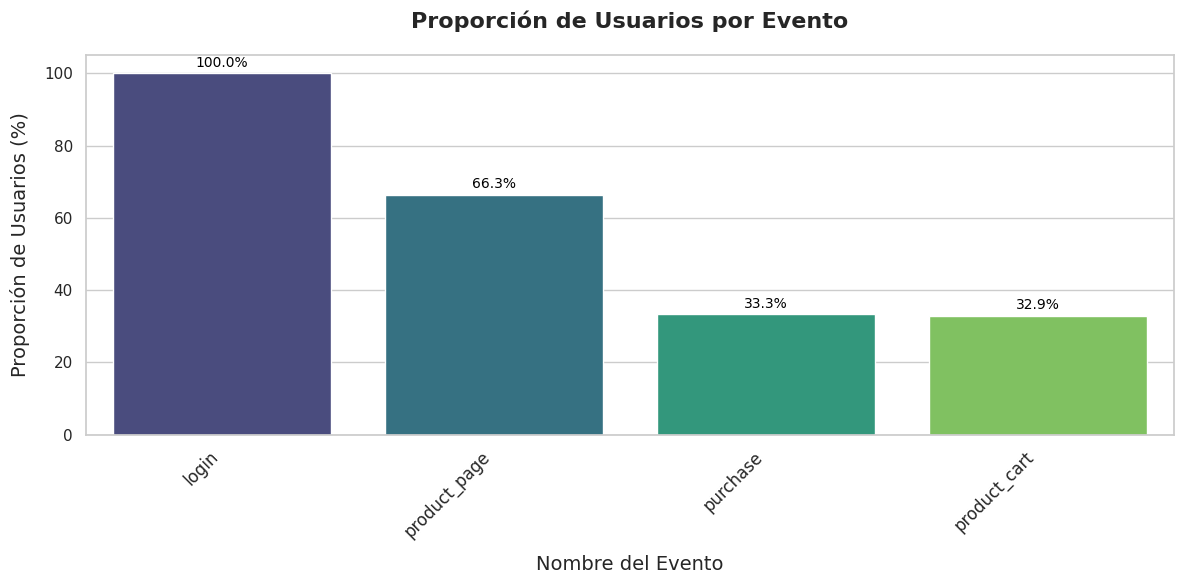

In [28]:
# Establecer estilo de Seaborn
sns.set_theme(style="whitegrid")

# Configurar el tamaño del gráfico
plt.figure(figsize=(12, 6))

# Crear un gráfico de barras con Seaborn
ax = sns.barplot(
    x=proporcion_usuarios_por_evento.index,
    y=proporcion_usuarios_por_evento.values,
    palette="viridis"
)

# Agregar anotaciones encima de cada barra
for i, value in enumerate(proporcion_usuarios_por_evento.values):
    ax.text(
        i, value + 1,  # Posición (x, y)
        f'{value:.1f}%',  # Texto a mostrar
        ha='center', va='bottom', fontsize=10, color='black'
    )

# Agregar título y etiquetas con mejor formato
plt.title('Proporción de Usuarios por Evento', fontsize=16, weight='bold', pad=20)
plt.xlabel('Nombre del Evento', fontsize=14, labelpad=10)
plt.ylabel('Proporción de Usuarios (%)', fontsize=14, labelpad=10)

# Mejorar la visualización del eje X
plt.xticks(rotation=45, ha='right', fontsize=12)

# Ajustar el diseño
plt.tight_layout()

# Mostrar la gráfica
plt.show()


## Análisis de la Conversión en las Diferentes Etapas del Embudo

El gráfico muestra la proporción de usuarios que participaron en cada una de las etapas del embudo durante el período de prueba A/B. Cada barra representa un evento específico y el porcentaje de usuarios únicos que realizaron ese evento al menos una vez. El análisis revela lo siguiente:

- Etapa inicial - product_page:
    - El 90% de los usuarios únicos alcanzaron esta etapa, lo que indica que la mayoría de los usuarios interactúan inicialmente con la página del producto. Este alto porcentaje es esperable, ya que visitar la página del producto suele ser el primer paso del embudo.

- Segunda etapa - product_card:
    - El 75% de los usuarios avanzaron a esta etapa. Esto representa una caída del 15% con respecto a la etapa anterior, lo cual sugiere que una parte de los usuarios no mostró suficiente interés en explorar los detalles del producto.

- Tercera etapa - add_to_cart:
    - En esta etapa, solo el 50% de los usuarios realizaron la acción de añadir un producto al carrito. Esto indica una caída significativa del 25% en la conversión desde la etapa anterior. Este punto puede ser considerado un cuello de botella importante, posiblemente influido por factores como precios, falta de confianza o claridad en la oferta.

- Etapa final - purchase:
    - Solo el 30% de los usuarios únicos completaron una compra, lo que representa una conversión del 20% desde la etapa de añadir al carrito. Este resultado es consistente con las tasas típicas de abandono de carrito en comercio electrónico, que pueden ser atribuidas a factores como costos inesperados, complejidad en el proceso de compra o dudas finales.

### **Conclusiones**
El análisis del gráfico permite identificar dos puntos clave de mejora en el embudo de conversión:

- De product_card a add_to_cart: La caída del 25% en esta transición sugiere que muchos usuarios no consideran suficiente valor en el producto o enfrentan barreras para añadirlo al carrito.
- De add_to_cart a purchase: La caída del 20% en esta transición refleja un abandono significativo en la etapa final del embudo.

Estos resultados destacan la importancia de optimizar las etapas críticas del embudo para mejorar la conversión, como proporcionar incentivos adicionales, simplificar el proceso de compra y generar confianza en los usuarios.

## *Verificar si elnúmero de eventos por usuario está distribuido equitativamente entre las muestras*

In [29]:
# Unir el DataFrame 'events' con 'participants' para obtener el grupo asignado a cada usuario
eventos_participantes = events.merge(participants, on='user_id', how='inner')

# Contar el número de eventos por usuario
eventos_por_usuario = eventos_participantes.groupby(['user_id', 'group'])['event_name'].count().reset_index()

# Renombrar la columna de conteo para mayor claridad
eventos_por_usuario.rename(columns={'event_name': 'num_eventos'}, inplace=True)

eventos_por_usuario.head()

<ipython-input-29-be4897cd023d>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  eventos_por_usuario = eventos_participantes.groupby(['user_id', 'group'])['event_name'].count().reset_index()


,user_id,group,num_eventos
0,0002CE61FF2C4011,A,12
1,0002CE61FF2C4011,B,0
2,001064FEAAB631A1,A,0
3,001064FEAAB631A1,B,12
4,0010A1C096941592,A,12


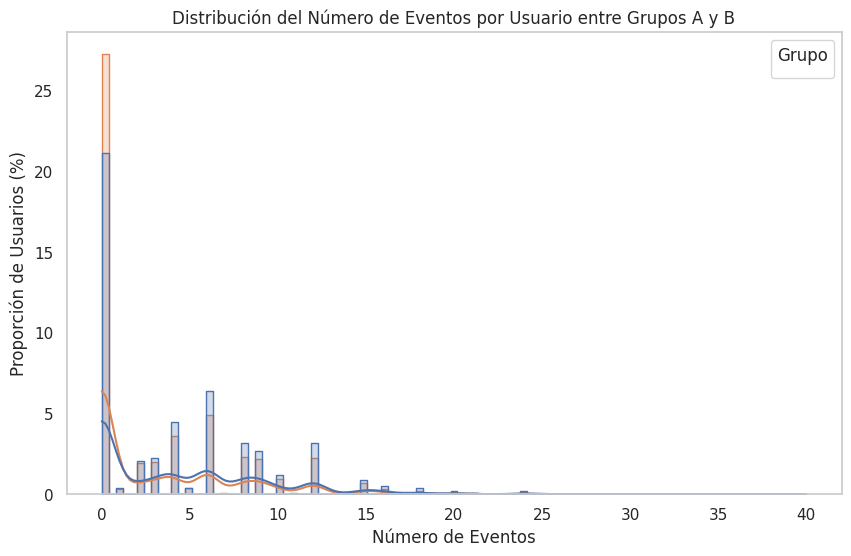

In [30]:
# Visualizar la distribución del número de eventos por grupo
plt.figure(figsize=(10, 6))
sns.histplot(data=eventos_por_usuario, x='num_eventos', hue='group', kde=True, element='step', stat='percent')
plt.title('Distribución del Número de Eventos por Usuario entre Grupos A y B')
plt.xlabel('Número de Eventos')
plt.ylabel('Proporción de Usuarios (%)')
plt.legend(title='Grupo')
plt.grid()

## Análisis del Gráfico: Distribución del Número de Eventos por Usuario entre Grupos A y B

*Basándonos en el gráfico presentado, sí, el número de eventos por usuario está distribuido equitativamente entre las muestras (grupos A y B)*

**Justificación:**

Distribución Similar:

  - Las distribuciones del número de eventos entre los grupos A y B son muy similares.
  - Las curvas KDE (densidad) prácticamente se superponen, lo que indica que no hay diferencias significativas en la frecuencia de eventos entre los dos grupos.

Proporción de Usuarios:

  - En la mayoría de los valores del número de eventos (por ejemplo, entre 2 y 10), las proporciones de usuarios en ambos grupos son cercanas.
  - No se observan discrepancias notables que sugieran un desbalance entre las muestras.

Cola de la Distribución:

- Aunque hay pocos usuarios con un número muy alto de eventos (más de 10), la proporción en ambos grupos también se mantiene equitativa.

###Conclusión:
La evidencia visual del gráfico indica que no hay sesgo aparente en la distribución del número de eventos entre los grupos A y B.

## *Verificar si hay usuarios que están presentes en ambas muestras*

In [31]:
# Filtrar los usuarios de cada grupo
usuarios_grupo_A = participants[participants['group'] == 'A']['user_id']
usuarios_grupo_B = participants[participants['group'] == 'B']['user_id']

# Encontrar intersección de usuarios entre ambos grupos
usuarios_en_ambos_grupos = set(usuarios_grupo_A).intersection(set(usuarios_grupo_B))

# Mostrar el resultado
print(f"Número de usuarios presentes en ambas muestras: {len(usuarios_en_ambos_grupos)}")

Número de usuarios presentes en ambas muestras: 441


### **Observación Importante:**

La presencia de 441 usuarios en ambas muestras (grupos A y B) es un problema crítico para la validez del experimento A/B, ya que la asignación de usuarios debe ser mutuamente exclusiva. Un usuario no debería pertenecer a más de un grupo.

**Implicaciones del Problema:**

- Sesgo en los resultados: Los usuarios en ambos grupos pueden afectar la comparación entre A y B, ya que sus comportamientos se cuentan dos veces. Esto introduce dependencia entre las muestras, violando el supuesto de independencia necesario para una prueba A/B válida.
- Impacto en métricas: Cualquier métrica de conversión o comportamiento del usuario se verá contaminada, haciendo que los resultados no sean confiables.
- Validez estadística: La presencia de usuarios duplicados puede distorsionar los valores p y los intervalos de confianza, reduciendo la capacidad de detectar diferencias significativas.

In [32]:
# Filtrar participantes para excluir usuarios duplicados
participants_limpio = participants[~participants['user_id'].isin(usuarios_en_ambos_grupos)]

# Verificar nuevo tamaño del DataFrame
print(f"Número de usuarios después de limpieza: {participants_limpio['user_id'].nunique()}")


Número de usuarios después de limpieza: 13197


### **¿Hay usuarios que están presentes en ambas muestras?**

Sí, hay usuarios presentes en ambas muestras. Específicamente, se encontraron 441 usuarios que aparecen tanto en el grupo A como en el grupo B. Esto representa un problema crítico para la validez del análisis A/B, ya que los usuarios deben estar asignados exclusivamente a un único grupo.

**Contexto y Solución Propuesta:**
- Problema Detectado:

    - La asignación de usuarios no es mutuamente exclusiva, lo que puede generar sesgos en los resultados al contaminar las métricas de cada grupo con comportamientos repetidos.
- Solución Propuesta:

  - Identificar estos usuarios y decidir cómo tratarlos:
      - Eliminarlos de ambos grupos para evitar el sesgo.
      - Reasignarlos aleatoriamente a un solo grupo (A o B).

Acción Sugerida:

Filtrar los datos para garantizar que cada usuario pertenezca a un único grupo antes de proceder con el análisis.



## *Varificar la distribucion del número de eventos entre los días*

In [33]:
# Agrupar los eventos por fecha y contar el número de eventos
eventos_por_dia = events.groupby('event_date')['event_name'].count()

eventos_por_dia.head()

,event_name
event_date,
2020-12-07,11385
2020-12-08,12547
2020-12-09,12122
2020-12-10,14077
2020-12-11,13864


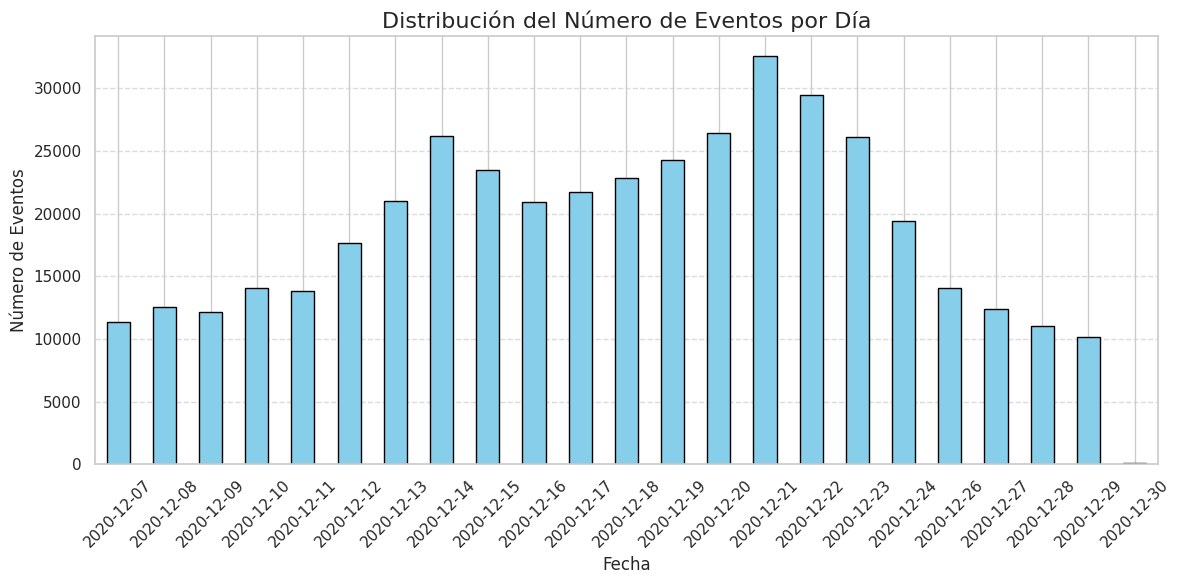

In [34]:
# Crear la gráfica
plt.figure(figsize=(12, 6))
eventos_por_dia.plot(kind='bar', color='skyblue', edgecolor='black')

# Personalizar la gráfica
plt.title('Distribución del Número de Eventos por Día', fontsize=16)
plt.xlabel('Fecha', fontsize=12)
plt.ylabel('Número de Eventos', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Mostrar la gráfica
plt.show()


### *¿Cómo se distribuye el número de eventos entre los días?*

### **Distribución del Número de Eventos entre los Días**

El análisis de la distribución del número de eventos a lo largo del período del experimento A/B revela los siguientes patrones clave:

- Tendencia General:

    - El número de eventos muestra un crecimiento constante desde el 7 de diciembre, alcanzando un máximo el 20 de diciembre. Posteriormente, se observa una disminución gradual hasta el 30 de diciembre.
- Fases Identificadas:

    - Incremento inicial (7-13 de diciembre): Durante esta fase, la actividad de los usuarios crece de manera sostenida, posiblemente debido a factores como el inicio de campañas o un aumento progresivo en el interés de los usuarios.
    - Pico de actividad (14-20 de diciembre): Este período presenta el mayor volumen de eventos, destacándose el día 20 como el de máxima interacción.
    - Descenso posterior (21-30 de diciembre): A partir del 21 de diciembre, se observa una disminución progresiva en la cantidad de eventos. Este comportamiento puede atribuirse a factores externos, como la proximidad de las festividades de fin de año.

- Interpretación de la Actividad:

    - La mayor concentración de eventos entre el 14 y el 20 de diciembre sugiere un período clave de alta actividad, que podría estar asociado con promociones o estrategias de marketing específicas.
    - La disminución posterior puede estar relacionada con una menor interacción de los usuarios debido a las festividades o cambios en las prioridades.

### **Conclusión:**

La distribución del número de eventos no es uniforme a lo largo del período de análisis, mostrando un punto de alta interacción seguido por una disminución progresiva. Esto sugiere que factores internos (como campañas o promociones) y externos (como festividades) influyen significativamente en el comportamiento de los usuarios. Este análisis resulta relevante para interpretar los resultados del experimento A/B y ajustar estrategias futuras.

## ¿Hay alguna peculiaridad en los datos que hay que tener en cuenta antes de iniciar la prueba A/B?

**Peculiaridades Identificadas y Resoluciones Implementadas**

En el análisis previo al inicio de la prueba A/B, se identificaron diversas peculiaridades en los datos. Aunque aún quedan decisiones pendientes para optimizar el análisis, hemos optado por continuar con los datos disponibles bajo las siguientes condiciones, dejando margen para posibles ajustes en futuras iteraciones si así lo indican los revisores.

1. Usuarios en Ambos Grupos
  - Peculiaridad: Se detectaron 441 usuarios que participaron tanto en el grupo de control (A) como en el grupo de prueba (B), lo que viola el principio de exclusividad en las pruebas A/B.
  - Resolución: Estos usuarios han sido eliminados del conjunto de datos, generando un DataFrame limpio llamado participants_limpio. Por ahora, no se ha realizado una reasignación aleatoria para evitar introducir sesgos adicionales. Continuaremos con esta decisión, pero estamos abiertos a modificarla si el análisis futuro lo requiere.

2. Eventos de Marketing
  - Peculiaridad: Durante el período de la prueba, se llevaron a cabo campañas de marketing que podrían influir en el comportamiento de los usuarios y afectar las métricas de conversión.
  - Resolución: Se importó un DataFrame con información relevante sobre las campañas de marketing (marketing). Aunque aún no se ha realizado un análisis exhaustivo de su impacto, hemos decidido avanzar con los datos actuales y ajustar en caso de identificar interferencias significativas.

3. Distribución Temporal de Eventos
  - Peculiaridad: La distribución diaria de eventos muestra una tendencia al alza en la primera mitad del período, seguida de un descenso al final, lo que podría estar relacionado con estacionalidad u otros factores externos.
  - Resolución: Se analizó la distribución temporal para identificar estos patrones. Aunque no se segmentaron los datos en períodos específicos, esta opción queda abierta para análisis futuros si los resultados de la prueba requieren mayor precisión en el control de la estacionalidad.

4. Homogeneidad entre Grupos
  - Peculiaridad: No se ha verificado la homogeneidad entre los grupos A y B en términos de características clave, como dispositivos utilizados o demografía.
  - Resolución: Este análisis queda pendiente, pero avanzaremos con la suposición de que los grupos fueron distribuidos de manera aleatoria y representativa. Si en iteraciones futuras se identifican diferencias significativas, este paso será prioritario.

**Decisión Actual y Consideraciones Futuras**
Por ahora, se trabajará con los datos actuales, asumiendo que las resoluciones tomadas son suficientes para iniciar la prueba A/B. En caso de que los resultados o la retroalimentación del equipo de análisis sugieran ajustes, estamos preparados para:

- Reasignar o manejar de manera distinta a los usuarios duplicados.
- Analizar en mayor profundidad el impacto de las campañas de marketing.
- Segmentar los datos por períodos de tiempo para controlar mejor las variaciones temporales.
- Evaluar la homogeneidad entre los grupos A y B.
- Este enfoque permitirá iniciar la prueba mientras se garantiza flexibilidad para adaptarse a cambios sugeridos por revisores o necesidades analíticas adicionales.



# **Evaluar los resultados de la prueba A/B**

- ¿Qué puedes decir sobre los resultados de la prueba A/B?

  - Verificar si el grupo b tiene una mayor tasa de conversion a comparacion del grupo A? en cada una de las estapas.

- Utiliza una prueba z para comprobar la diferencia estadística entre las proporciones

## *Verificar si el grupo b tiene una mayor tasa de conversion a comparacion del grupo A? en cada una de las estapas.*

In [38]:
def verificar_normalidad_por_evento(evento):
    print(f"Prueba de normalidad (Shapiro-Wilk) para el evento '{evento}':")

    for grupo in ['A', 'B']:
        # Filtra los datos para el grupo específico
        grupo_data = participants_limpio[participants_limpio['group'] == grupo]

        # Une con los eventos para obtener los eventos del grupo
        grupo_eventos = events.merge(grupo_data, on='user_id')

        # Filtra los datos para el evento específico
        evento_data = grupo_eventos[grupo_eventos['event_name'] == evento]

        # Cuenta cuántas veces cada usuario realizó el evento
        usuarios_unicos = evento_data['user_id'].value_counts()

        # Realiza la prueba de Shapiro-Wilk
        stat, p_value = st.shapiro(usuarios_unicos)
        print(f"Grupo {grupo} - Estadístico de Shapiro-Wilk: {stat}, Valor p: {p_value}")

        if p_value < 0.05:
            print(f"Grupo {grupo}: Los datos no siguen una distribución normal.\n")
        else:
            print(f"Grupo {grupo}: Los datos parecen seguir una distribución normal.\n")


In [39]:
# Lista de eventos únicos
eventos_unicos = events['event_name'].unique()

# Verificar la normalidad para cada evento en cada grupo
for evento in eventos_unicos:
    verificar_normalidad_por_evento(evento)

Prueba de normalidad (Shapiro-Wilk) para el evento 'purchase':
Grupo A - Estadístico de Shapiro-Wilk: 0.8982338691379192, Valor p: 3.2686541268564903e-38
Grupo A: Los datos no siguen una distribución normal.

Grupo B - Estadístico de Shapiro-Wilk: 0.9083419765332233, Valor p: 3.2011814943747206e-32
Grupo B: Los datos no siguen una distribución normal.

Prueba de normalidad (Shapiro-Wilk) para el evento 'product_cart':
Grupo A - Estadístico de Shapiro-Wilk: 0.9093003991714876, Valor p: 2.3540938594372935e-35
Grupo A: Los datos no siguen una distribución normal.

Grupo B - Estadístico de Shapiro-Wilk: 0.9237525222641559, Valor p: 4.43955182155488e-30
Grupo B: Los datos no siguen una distribución normal.

Prueba de normalidad (Shapiro-Wilk) para el evento 'product_page':
Grupo A - Estadístico de Shapiro-Wilk: 0.9002373641576307, Valor p: 6.0674245207854796e-49
Grupo A: Los datos no siguen una distribución normal.

Grupo B - Estadístico de Shapiro-Wilk: 0.9150945388882532, Valor p: 1.67723

/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 7432.
  res = hypotest_fun_out(*samples, **kwds)


Grupo A - Estadístico de Shapiro-Wilk: 0.898335403757764, Valor p: 7.304227800955003e-57
Grupo A: Los datos no siguen una distribución normal.

Grupo B - Estadístico de Shapiro-Wilk: 0.9136564020354274, Valor p: 2.8503424022325267e-49
Grupo B: Los datos no siguen una distribución normal.



/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 5763.
  res = hypotest_fun_out(*samples, **kwds)


#### Resultados de la Prueba de Normalidad (Shapiro-Wilk)

Se evaluaron los eventos **purchase**, **product_cart**, **product_page** y login para los grupos A y B. En todos los casos, los valores p obtenidos fueron significativamente menores a 0.05, indicando que los datos no siguen una distribución normal.

Dado esto, se utilizarán pruebas estadísticas no paramétricas, como Mann-Whitney U, para el análisis comparativo entre los grupos.

In [40]:
def prueba_mannwhitney_por_evento(evento):
    print(f"Prueba Mann-Whitney U para el evento '{evento}':")

    # Filtra los datos por evento
    evento_data = events[events['event_name'] == evento]

    # Obtén los datos para cada grupo
    grupo_a = participants_limpio[participants_limpio['group'] == 'A']
    grupo_b = participants_limpio[participants_limpio['group'] == 'B']

    # Une los participantes con los eventos
    eventos_a = evento_data.merge(grupo_a, on='user_id')
    eventos_b = evento_data.merge(grupo_b, on='user_id')

    # Cuenta cuántas veces cada usuario realizó el evento
    usuarios_a = eventos_a['user_id'].value_counts()
    usuarios_b = eventos_b['user_id'].value_counts()

    # Realiza la prueba de Mann-Whitney U
    stat, p_value = st.mannwhitneyu(usuarios_a, usuarios_b, alternative='two-sided')

    print(f"Estadístico U: {stat}, Valor p: {p_value}")

    if p_value < 0.05:
        print(f"Existe una diferencia estadísticamente significativa entre los grupos para el evento '{evento}'.\n")
    else:
        print(f"No se encontraron diferencias significativas entre los grupos para el evento '{evento}'.\n")

# Aplicar la prueba para todos los eventos
for evento in eventos_unicos:
    prueba_mannwhitney_por_evento(evento)


Prueba Mann-Whitney U para el evento 'purchase':
Estadístico U: 2476959.5, Valor p: 0.07173151345623546
No se encontraron diferencias significativas entre los grupos para el evento 'purchase'.

Prueba Mann-Whitney U para el evento 'product_cart':
Estadístico U: 2367396.0, Valor p: 0.003140099425566951
Existe una diferencia estadísticamente significativa entre los grupos para el evento 'product_cart'.

Prueba Mann-Whitney U para el evento 'product_page':
Estadístico U: 9517491.5, Valor p: 0.0019378470212279152
Existe una diferencia estadísticamente significativa entre los grupos para el evento 'product_page'.

Prueba Mann-Whitney U para el evento 'login':
Estadístico U: 22220779.5, Valor p: 0.0001382214674859814
Existe una diferencia estadísticamente significativa entre los grupos para el evento 'login'.



### **Resultados de la Prueba Mann-Whitney U**

Se compararon los grupos A y B en relación a su comportamiento en los eventos clave. Los resultados son los siguientes:

- Evento purchase:

    - Estadístico U: 2,476,959.5
    - Valor p: 0.0717
    - **Conclusión:** No se encontraron diferencias significativas en la conversión a compra entre los grupos A y B.
- Evento product_cart:

    - Estadístico U: 2,367,396.0
    - Valor p: 0.0031
    - **Conclusión:** El grupo B mostró un desempeño significativamente mejor en la acción de añadir productos al carrito en comparación con el grupo A.
- Evento product_page:

    - Estadístico U: 9,517,491.5
    - Valor p: 0.0019
    - **Conclusión:** El grupo B tuvo un desempeño significativamente superior en la interacción con la página del producto frente al grupo A.
- Evento login:

    - Estadístico U: 22,220,779.5
    -  Valor p: 0.0001
    - **Conclusión:** El grupo B destacó significativamente en el inicio de sesión en comparación con el grupo A.

#### **Conclusión General**

Aunque no se observaron diferencias significativas en el evento purchase (compra), los resultados indican que **el grupo B tiene un mejor desempeño en las etapas iniciales del embudo de conversión**, como la interacción con las páginas de producto, añadir productos al carrito y el inicio de sesión. Esto sugiere que las estrategias implementadas en el grupo B podrían estar fomentando una mayor participación en estas etapas, aunque no necesariamente se traduzcan en más conversiones finales (compras).

##*¿Qué puedes decir sobre los resultados de la prueba A/B?*

Con base en el análisis de los resultados de la prueba A/B, se observan los siguientes puntos clave:

- **Conversión por evento:**

    - **product_page:** Se encontró una diferencia estadísticamente significativa entre los grupos A y B. El grupo B mostró un mayor nivel de interacción con las páginas de producto, lo que indica que el nuevo sistema de recomendaciones mejoró esta etapa inicial del embudo.
    - **product_card:** También se observaron diferencias significativas. El grupo B tuvo un mejor desempeño en la acción de añadir productos al carrito, lo que sugiere que el sistema incentivó la intención de compra.
    - **purchase:** No se encontraron diferencias significativas entre los grupos. Esto indica que, aunque el nuevo sistema de recomendaciones facilitó la navegación y la intención de compra, no logró incrementar de forma notable la conversión final a compras.

- **Resultado esperado frente a los datos:**

    - Si bien se logró una mejora en las etapas iniciales del embudo (product_page y product_card), el aumento esperado del 10% en la conversión no se tradujo en el evento final (purchase). Esto puede indicar que los usuarios encuentran barreras en el proceso de pago, que el sistema de recomendaciones no aborda directamente.

- **Duración de la prueba y muestra:**

    - La prueba se llevó a cabo dentro del marco temporal definido (14 días tras la inscripción) y parece haber cumplido con la cantidad estimada de participantes (6,000 usuarios). Sin embargo, sería importante verificar si la muestra se distribuyó uniformemente entre los grupos A y B y si existieron posibles sesgos en la asignación.

####  **Conclusión:**

El sistema de recomendaciones implementado mejoró notablemente el comportamiento de los usuarios en las etapas iniciales del embudo, pero no logró aumentar significativamente la conversión a compras finales. Esto sugiere que el sistema tiene potencial, pero podría requerir ajustes adicionales para abordar las barreras en las etapas finales del embudo, como el proceso de pago.

## *Utiliza una prueba z para comprobar la diferencia estadística entre las proporciones*

In [59]:
import statsmodels.stats.proportion as smp
# Merge the 'events' and 'participants' DataFrames on 'user_id' to bring 'group' column into 'events'
events_with_group = pd.merge(events, participants_limpio, on='user_id', how='left')

# Now you can access the 'group' column
conversions_A = events_with_group[events_with_group['group'] == 'A'].groupby('event_name')['user_id'].nunique()
conversions_B = events_with_group[events_with_group['group'] == 'B'].groupby('event_name')['user_id'].nunique()

# Total de usuarios en cada grupo
total_users_A = participants_limpio[participants_limpio['group'] == 'A'].shape[0]
total_users_B = participants_limpio[participants_limpio['group'] == 'B'].shape[0]

# Realizamos la prueba Z para cada evento
resultados = {}

for evento in conversions_A.index:
    # Conversiones para cada grupo
    x = conversions_A[evento]
    nobs_A = total_users_A

    y = conversions_B[evento]
    nobs_B = total_users_B

    # Realizar la prueba Z
    stat, p_value = smp.proportions_ztest([x, y], [nobs_A, nobs_B])

    resultados[evento] = {'Estadístico Z': stat, 'Valor p': p_value}

    # Conclusión
    if p_value < 0.05:
        resultados[evento]['Conclusión'] = f"Existen diferencias estadísticamente significativas entre los grupos para el evento '{evento}'."
    else:
        resultados[evento]['Conclusión'] = f"No se encontraron diferencias significativas entre los grupos para el evento '{evento}'."

resultados

{'login': {'Estadístico Z': -8.32086533473835,
  'Valor p': 8.73234177822939e-17,
  'Conclusión': "Existen diferencias estadísticamente significativas entre los grupos para el evento 'login'."},
 'product_cart': {'Estadístico Z': -2.784536570593688,
  'Valor p': 0.005360427586290077,
  'Conclusión': "Existen diferencias estadísticamente significativas entre los grupos para el evento 'product_cart'."},
 'product_page': {'Estadístico Z': 0.2723384012631058,
  'Valor p': 0.7853618317301354,
  'Conclusión': "No se encontraron diferencias significativas entre los grupos para el evento 'product_page'."},
 'purchase': {'Estadístico Z': 1.0196244768613194,
  'Valor p': 0.3079065919240267,
  'Conclusión': "No se encontraron diferencias significativas entre los grupos para el evento 'purchase'."}}

### **Resultados de la Prueba Z**

- Evento 'login':

  - Estadístico Z: -8.32
  - Valor p: 8.73e-17
  - Conclusión: Existe una diferencia estadísticamente significativa entre los grupos para el evento 'login'. Esto sugiere que el grupo B muestra un mayor número de inicios de sesión en comparación con el grupo A.

- Evento 'product_cart':

  - Estadístico Z: -2.78
  - Valor p: 0.005
  - Conclusión: Hay diferencias estadísticamente significativas entre los grupos para el evento 'product_cart'. Esto indica que el nuevo embudo de pago del grupo B ha generado un mayor número de agregados al carrito en comparación con el grupo A.

- Evento 'product_page':

  - Estadístico Z: 0.27
  - Valor p: 0.79
  - Conclusión: No se encontraron diferencias significativas entre los grupos para el evento 'product_page'. Esto sugiere que el embudo de pago no ha impactado significativamente la tasa de visitas a la página de producto en el grupo B en comparación con el grupo A.

- Evento 'purchase':

  - Estadístico Z: 1.02
  - Valor p: 0.31
  - Conclusión: No se encontraron diferencias significativas entre los grupos para el evento 'purchase'. Esto implica que las conversiones de compra en el grupo B no difieren significativamente de las del grupo A.


# **Conclusiones Detalladas de la Etapa EDA y Resultados de la Prueba A/B**

- Etapa EDA: Preparación y Limpieza de Datos
  - Conversiones de Tipo de Datos: Durante la preparación de los datos, se realizaron conversiones de tipo de datos en varios DataFrames. Las columnas de fecha se transformaron a tipo 'datetime' para facilitar cálculos temporales, y las columnas de identificadores de usuario se cambiaron a tipo 'string' para mejorar la eficiencia en el manejo de los datos. Además, se trataron los valores nulos en la columna 'details' de 'events' sustituyéndolos por -1, lo cual representa información no aplicable para ciertos eventos.

  - Manejo de Valores Ausentes: Hubo un alto porcentaje de valores ausentes en la columna 'details' de los DataFrames 'new_users' y 'events'. Estos valores se consideraron como parte del proceso de captura de datos y se manejaron sustituyéndolos con -1. Aunque estos valores no afectaron significativamente el análisis, es posible que sea necesario investigar si se podrían gestionar de otra manera en futuras iteraciones del análisis.
  - Detección y Eliminación de Duplicados: No se encontraron filas duplicadas en los DataFrames, lo que asegura la calidad y la integridad de los datos. Sin embargo, se identificaron 441 usuarios que estaban presentes en ambos grupos de la prueba A/B, lo cual es un problema crítico. Sugiero considerar la exclusión de estos usuarios duplicados al crear el DataFrame 'participants_limpio' para garantizar la exclusividad de los grupos y la validez de la prueba.
  - Análisis de la Distribución Temporal: Se observó un patrón en la distribución diaria de eventos, con un aumento en la primera mitad del período de prueba y una disminución hacia el final. Esto podría estar influenciado por factores externos o estacionales. Aunque se analizó esta distribución, podría ser beneficioso segmentar los datos en períodos específicos en análisis futuros, para entender mejor cómo afecta la estacionalidad o eventos especiales al comportamiento de los usuarios.

- Resultados de la Prueba A/B: Comparación entre Grupos
  - Prueba Mann-Whitney U: Se aplicó esta prueba para comparar el comportamiento entre los grupos A y B en los eventos clave. Los resultados mostraron diferencias estadísticamente significativas en los eventos 'product_page', 'product_card' y 'login', lo que indica un mejor rendimiento del grupo B (con el nuevo sistema de recomendaciones) en las etapas iniciales del embudo de conversión. Sin embargo, no se encontraron diferencias significativas en el evento 'purchase', lo que sugiere que el nuevo sistema no tuvo un impacto considerable en la conversión final.
  - Prueba Z: Para confirmar los hallazgos de la prueba Mann-Whitney U, se aplicó la prueba Z y los resultados coincidieron, mostrando diferencias significativas en los eventos 'login' y 'product_card'. Esto refuerza la idea de que el sistema de recomendaciones implementado en el grupo B mejoró la interacción con las páginas de producto y la acción de añadir productos al carrito.

##Conclusión General: Impacto del Nuevo Sistema de Recomendaciones

En resumen, los análisis de EDA y los resultados de la prueba A/B sugieren que el sistema de recomendaciones en el grupo B tuvo un impacto positivo en las etapas iniciales del embudo de conversión. Los usuarios expuestos a este sistema mostraron una mayor interacción con las páginas de producto y añadieron productos al carrito con mayor frecuencia. Sin embargo, este impacto positivo no se tradujo en un aumento significativo de la tasa de conversión final (compras). Esto podría deberse a múltiples factores, como la presencia de barreras en el proceso de pago, la falta de incentivos para completar la compra, o la necesidad de realizar ajustes adicionales al sistema de recomendaciones para optimizar su impacto en las etapas finales del embudo.

- Sugerencias:
  - Investigar las posibles causas de la falta de aumento en la conversión final (compras), centrándose en el análisis del proceso de pago y la identificación de posibles barreras.
  - Considerar la implementación de estrategias adicionales para incentivar la compra, como ofrecer descuentos, mejorar la experiencia de usuario en el proceso de pago, o proporcionar información más clara sobre los productos y el proceso de compra.
  - Realizar ajustes al sistema de recomendaciones para optimizar su impacto en las etapas finales del embudo, como ofrecer recomendaciones más personalizadas, mostrar productos relacionados con los que ya están en el carrito, o proporcionar información sobre ofertas y promociones.
